In [87]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Challenge 1

In [45]:
def roll_a_dice():
    return pd.DataFrame({'value':[random.randrange(1,7) for i in range(10)]}, index = range(1,11))
     

In [73]:
results = roll_a_dice()
results

,value
1,3
2,5
3,2
4,2
5,3
6,6
7,3
8,5
9,5
10,2


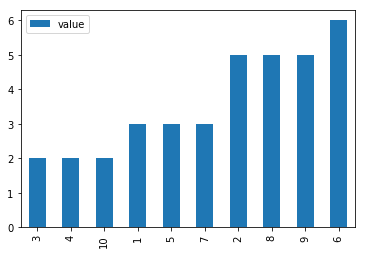

In [74]:
results.sort_values(by='value').plot(kind='bar')

<BarContainer object of 6 artists>

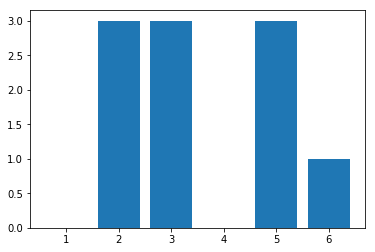

In [93]:
freqs = results['value'].value_counts()
freqs = pd.DataFrame(data=freqs).sort_index().reset_index().rename(columns={'value':'freq','index':'value'})
poss_values = pd.DataFrame(data={'value': pd.Series(range(1,7))})

hist = poss_values.merge(freqs, how='left').fillna(0)
plt.bar(hist['value'],hist['freq'])

# Challenge 2

In [178]:
def mean(results):
    return results['value'].sum()/len(results['value'])

mean(results)

3.6

In [113]:
def mean_freq(results):
    freqs = results['value'].value_counts()
    freqs = pd.DataFrame(data=freqs).sort_index().reset_index().rename(columns={'value':'freq','index':'value'})
    poss_values = pd.DataFrame(data={'value': pd.Series(range(1,7))})
    hist = poss_values.merge(freqs, how='left').fillna(0)
    return sum(hist['freq'])/len(hist['freq'])

mean_freq(results)

1.6666666666666667

In [155]:
def median(results):
    results_sorted = results.sort_values(by='value').reset_index(drop=True)
    if len(results_sorted)%2==0:
        return (results_sorted.loc[len(results_sorted)//2 - 1]['value'] + results_sorted.loc[len(results_sorted)//2 - 1]['value'])/2
    else:
        return results_sorted.loc[len(results_sorted)//2]['value']

In [156]:
median(results)

3.0

In [157]:
def quartiles(results):
    q2 = median(results)
    q1 = (q2 + min(results['value']))/2
    q3 = (q2 + max(results['value']))/2
    return q1,q2,q3

In [158]:
quartiles(results)

(2.5, 3.0, 4.5)

# Challenge 3

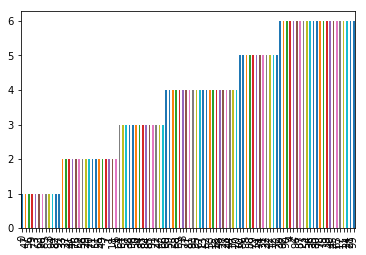

In [170]:
roll_hundred = pd.read_csv('roll_the_dice_hundred.csv').drop(['i'], axis=1)
roll_hundred['value'].sort_values().plot(kind='bar')

In [171]:
mean(roll_hundred)

3.74

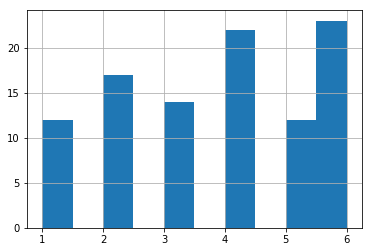

In [177]:
roll_hundred['value'].sort_values().hist()

In [180]:
roll_thousand = pd.read_csv('roll_the_dice_thousand.csv').drop(['i'], axis=1)

In [181]:
mean(roll_thousand)

3.447

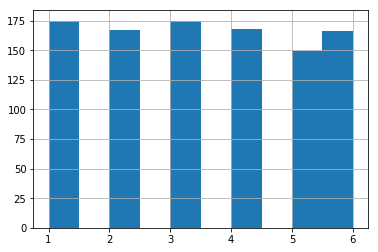

In [204]:
roll_thousand['value'].sort_values().hist()

### Frequencies becomes more similar as you roll the dice more times.

# Challenge 4

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B34DADF60>]],
      dtype=object)

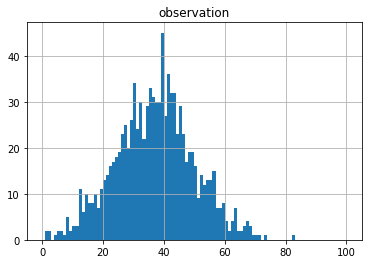

In [208]:
pop = pd.read_csv('ages_population.csv')
pop.hist(bins=100, range=(0,100))

mean seems to be arround 37 years old, std arround 15 years

In [186]:
pop['observation'].mean()

36.56

In [187]:
pop['observation'].std()

12.816499625976762

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B337864A8>]],
      dtype=object)

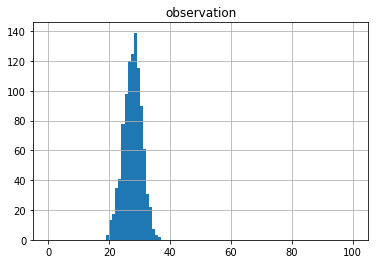

In [207]:
pop2 = pd.read_csv('ages_population2.csv')
pop2.hist(bins=100,range=(0,100))

In [190]:
pop2['observation'].mean()

27.155

In [191]:
pop2['observation'].std()

2.969813932689186

# Challenge 5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B356E0DA0>]],
      dtype=object)

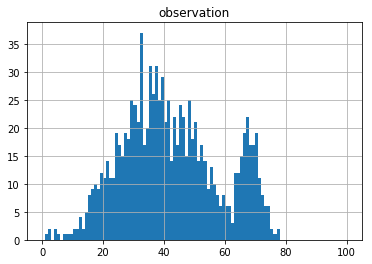

In [209]:
pop3 = pd.read_csv('ages_population3.csv')
pop3.hist(bins=100, range=(0,100))

In [194]:
pop3['observation'].mean()

41.989

In [195]:
pop3['observation'].std()

16.144705959865934

In [197]:
pop3.quantile(q=0.25)

observation    30.0
Name: 0.25, dtype: float64

In [198]:
pop3.quantile(q=0.5)

observation    40.0
Name: 0.5, dtype: float64

In [199]:
pop3.quantile(q=0.75)

observation    53.0
Name: 0.75, dtype: float64